In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic = titanic[['survived','pclass','sex','age']]

In [6]:
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male','female'], [0,1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [8]:
y = titanic['survived']
X = titanic.drop(['survived'], axis=1)

## With one neighbors

In [51]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X.values,y.values)
model.score(X.values,y.values)

0.8739495798319328

In [41]:
def survie(model, pclass=3, sex=1, age=24):
    x = np.array([pclass,sex,age]).reshape(1, 3)
    return model.predict(x)

In [42]:
survie(model)

array([1], dtype=int64)

## With multiples neighbors

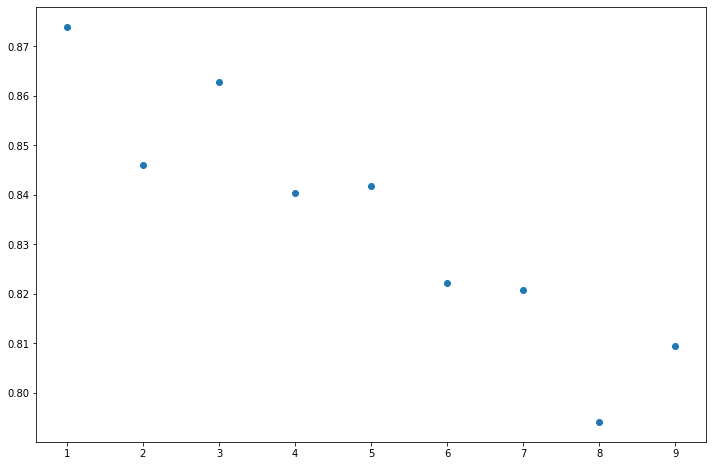

In [47]:
scores = []
axe = [i for i in range(1,10)]
for i in range(1,10):
    new_model = KNeighborsClassifier(n_neighbors=i)
    new_model.fit(X.values,y.values)
    scores.append(new_model.score(X.values, y.values))
    
plt.figure(figsize=(12,8))
plt.scatter(axe,scores)